## Data Augmentation 

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import os
from os.path import isfile, join
import pandas as pd
import numpy as np
from skimage.io import imread

In [ ]:
# First create a data generator
datagen = ImageDataGenerator(rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.15,
                            zoom_range=0.1,
                            channel_shift_range=10,
                            horizontal_flip=True)

In [ ]:
# 2nd realize transformations on the images

baseball = ['img/train/baseball/' + f for f in os.listdir('img/train/baseball/') if isfile(join('img/train/baseball/', f))]
image_path = baseball[0]
image = np.expand_dims(imread(image_path), axis=0)


In [ ]:
# Select destination for augmentated images

save_here = 'img/train/baseball/aug'

try:
    os.stat(save_here)
except:
    os.mkdir(save_here)

In [ ]:
# fit of the original image
datagen.fit(image)

In [ ]:
for x, val in zip(datagen.flow(image,
                              save_to_dir=save_here,
                              save_prefix='aug',
                              save_format='png'), range(10)):
    pass

In [ ]:
# Augmentation for all images of baseball

for image_path in baseball:
    image = np.expand_dims(imread(image_path), axis=0) 
    datagen.fit(image)
    for x, val in zip(datagen.flow(image,                     # image we choose
                              save_to_dir=save_here,          # the folder on we save the new image 
                              save_prefix='aug',               
                              save_format='png'), range(10)): # number of augmented images we want
        pass

In [ ]:
cricket = ['img/train/cricket/' + f for f in os.listdir('img/train/cricket/') if isfile(join('img/train/cricket/', f))]
save_here = 'img/train/cricket/aug'
try:
    os.stat(save_here)
except:
    os.mkdir(save_here)
for image_path in cricket:
    image = np.expand_dims(imread(image_path), axis=0) 
    datagen.fit(image)
    for x, val in zip(datagen.flow(image,                     # image we choose
                              save_to_dir=save_here,          # the folder on we save the new image 
                              save_prefix='aug',               
                              save_format='png'), range(10)): # number of augmented images we want
        pass

In [ ]:
football = ['img/train/football/' + f for f in os.listdir('img/train/football/') if isfile(join('img/train/football/', f))]
save_here = 'img/train/football/aug'
try:
    os.stat(save_here)
except:
    os.mkdir(save_here)
for image_path in football:
    image = np.expand_dims(imread(image_path), axis=0) 
    datagen.fit(image)
    for x, val in zip(datagen.flow(image,                     # image we choose
                              save_to_dir=save_here,          # the folder on we save the new image 
                              save_prefix='aug',               
                              save_format='png'), range(10)): # number of augmented images we want
        pass

## Prepare data

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import cv2

In [5]:
X = []
Y = []

for file in os.listdir('img/train/baseball/aug/'):
    image = imread('img/train/baseball/aug/'+file)
    smallimage = cv2.resize(image,(64,64))
    X.append(smallimage)
    Y.append(0)

for file in os.listdir('img/train/cricket/aug/'):
    image = imread('img/train/cricket/aug/'+file)
    smallimage = cv2.resize(image,(64,64))
    X.append(smallimage)
    Y.append(1)

for file in os.listdir('img/train/football/aug/'):
    image = imread('img/train/football/aug/'+file)
    smallimage = cv2.resize(image,(64,64))
    X.append(smallimage)
    Y.append(2)

In [6]:
X_128 = []
Y_128 = []

for file in os.listdir('img/train/baseball/aug/'):
    image = imread('img/train/baseball/aug/'+file)
    smallimage = cv2.resize(image,(128,128))
    X_128.append(smallimage)
    Y_128.append(0)

for file in os.listdir('img/train/cricket/aug/'):
    image = imread('img/train/cricket/aug/'+file)
    smallimage = cv2.resize(image,(128,128))
    X_128.append(smallimage)
    Y_128.append(1)

for file in os.listdir('img/train/football/aug/'):
    image = imread('img/train/football/aug/'+file)
    smallimage = cv2.resize(image,(128,128))
    X_128.append(smallimage)
    Y_128.append(2)

In [7]:
X,Y = np.array(X), np.array(Y)
X_128,Y_128 = np.array(X_128), np.array(Y_128)

In [8]:
X = X/255.0 # normalize X
X_128 = X_128/255.0

In [9]:
from sklearn.utils import shuffle

X,Y = shuffle(X,Y, random_state=42)

X_128,Y_128 = shuffle(X_128,Y_128, random_state=42)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = .2, random_state=42, stratify=Y)

print(X_train.shape); print(X_test.shape)

(1803, 64, 64, 3)
(451, 64, 64, 3)


## Transfer Learning

In [11]:
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [12]:
y_train = np_utils.to_categorical(y_train,3)

In [13]:
y_test = np_utils.to_categorical(y_test,3)

In [14]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(64,64,3),
                  include_top = False,
                   weights = 'imagenet'
                  )

In [15]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [16]:
for layer in base_model.layers:
    layer.trainable = False

### Create metric functions for model evaluation

In [17]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [18]:
## train de last layer of or base model with our data

x = layers.Flatten()(base_model.output)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dense(3, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc', f1_m, recall_m, precision_m])

In [19]:
vgghist = model.fit(X_train, y_train,
                   epochs = 20)

Epoch 1/20
57/57 [==============================] - 9s 148ms/step - loss: 0.6896 - acc: 0.7116 - f1_m: 0.6742 - recall_m: 0.9101 - precision_m: 0.5364
Epoch 2/20
57/57 [==============================] - 9s 157ms/step - loss: 0.2430 - acc: 0.9262 - f1_m: 0.7719 - recall_m: 0.9847 - precision_m: 0.6357
Epoch 3/20
57/57 [==============================] - 9s 158ms/step - loss: 0.1127 - acc: 0.9784 - f1_m: 0.8228 - recall_m: 0.9989 - precision_m: 0.7005
Epoch 4/20
57/57 [==============================] - 8s 146ms/step - loss: 0.0585 - acc: 0.9900 - f1_m: 0.8666 - recall_m: 0.9995 - precision_m: 0.7663
Epoch 5/20
57/57 [==============================] - 8s 148ms/step - loss: 0.0283 - acc: 0.9994 - f1_m: 0.8889 - recall_m: 1.0000 - precision_m: 0.8012
Epoch 6/20
57/57 [==============================] - 8s 146ms/step - loss: 0.0169 - acc: 1.0000 - f1_m: 0.9029 - recall_m: 1.0000 - precision_m: 0.8246
Epoch 7/20
57/57 [==============================] - 8s 149ms/step - loss: 0.0107 - acc: 1.0000

In [20]:
model.predict(np.expand_dims(X_test[4], axis=0))

1/1 [==============================] - 0s 156ms/step


array([[0.98387504, 0.11559972, 0.2280805 ]], dtype=float32)

### Prepare data test to predict

In [21]:
test = []

for file in os.listdir('img/test/'):
    image = imread('img/test/'+file)
    smallimage = cv2.resize(image,(64,64))
    test.append(smallimage)
    

In [22]:
test = np.array(test)/255.0


In [23]:
len(test)

41

In [24]:
preds = []
for i in range(len(test)):
    pred = model.predict(np.expand_dims(test[i], axis=0))
    #print(pred)
    if pred[0][0]>pred[0][1] and pred[0][0]>pred[0][2]:
        preds.append(0)
    elif pred[0][1]>pred[0][0] and pred[0][1]>pred[0][2]:
        preds.append(1)
    else:
        preds.append(2)
preds

1/1 [==============================] - 0s 26ms/step


[0,
 0,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 2]

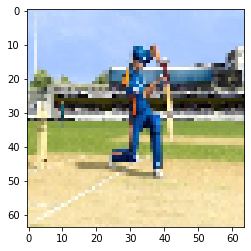

In [25]:
plt.imshow(test[4]);

In [26]:
preds[4]

1

C:\Users\botic\AppData\Local\Temp\ipykernel_31764\3168350087.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30,20))


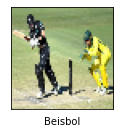

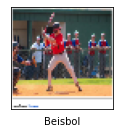

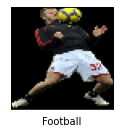

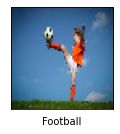

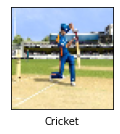

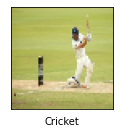

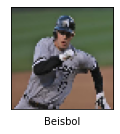

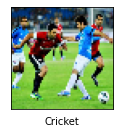

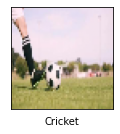

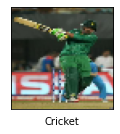

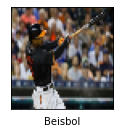

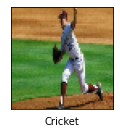

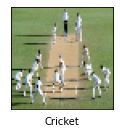

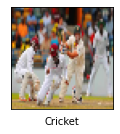

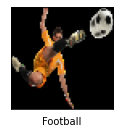

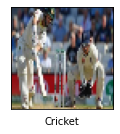

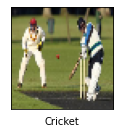

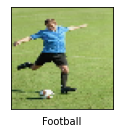

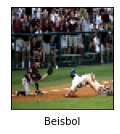

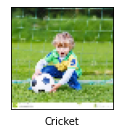

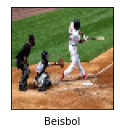

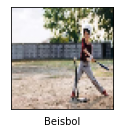

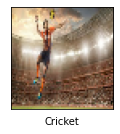

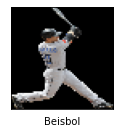

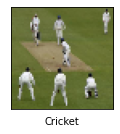

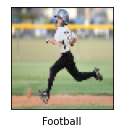

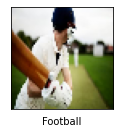

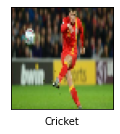

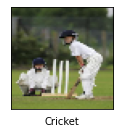

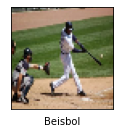

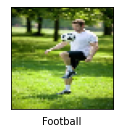

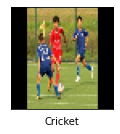

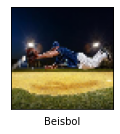

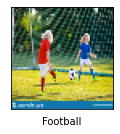

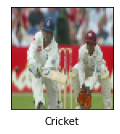

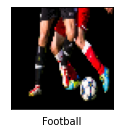

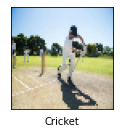

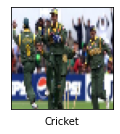

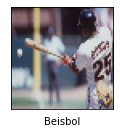

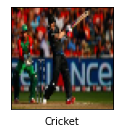

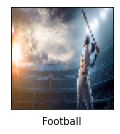

In [27]:
for i in range(len(test)):
    plt.figure(figsize=(30,20))
    plt.subplot(9,5,i+1)
    plt.xticks([])
    plt.yticks([])
    if preds[i] == 0:
        plt.xlabel('Beisbol')
        plt.imshow(test[i])
    elif preds[i] == 1:
        plt.xlabel('Cricket')
        plt.imshow(test[i])
    else:
        plt.xlabel('Football')
        plt.imshow(test[i])
plt.show()

## Test for samples of 128 x 128


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_128,Y_128, test_size = .2, random_state=42, stratify=Y_128)

print(X_train.shape); print(X_test.shape)

(1803, 128, 128, 3)
(451, 128, 128, 3)


In [29]:
y_train = np_utils.to_categorical(y_train,3)
y_test = np_utils.to_categorical(y_test,3)

In [30]:
base_model = VGG16(input_shape=(128,128,3),
                  include_top = False,
                   weights = 'imagenet'
                  )

for layer in base_model.layers:
    layer.trainable = False

In [31]:
x = layers.Flatten()(base_model.output)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dense(3, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc', f1_m, recall_m, precision_m])

vgghist = model.fit(X_train, y_train,
                   epochs = 20)

Epoch 1/20
57/57 [==============================] - 34s 588ms/step - loss: 1.1889 - acc: 0.6606 - f1_m: 0.6321 - recall_m: 0.8268 - precision_m: 0.5162
Epoch 2/20
57/57 [==============================] - 32s 555ms/step - loss: 0.2091 - acc: 0.9573 - f1_m: 0.8526 - recall_m: 0.9890 - precision_m: 0.7511
Epoch 3/20
57/57 [==============================] - 32s 561ms/step - loss: 0.0789 - acc: 0.9911 - f1_m: 0.9163 - recall_m: 0.9995 - precision_m: 0.8473
Epoch 4/20
57/57 [==============================] - 32s 568ms/step - loss: 0.0357 - acc: 0.9983 - f1_m: 0.9440 - recall_m: 1.0000 - precision_m: 0.8952
Epoch 5/20
57/57 [==============================] - 32s 562ms/step - loss: 0.0185 - acc: 1.0000 - f1_m: 0.9568 - recall_m: 1.0000 - precision_m: 0.9181
Epoch 6/20
57/57 [==============================] - 32s 566ms/step - loss: 0.0106 - acc: 1.0000 - f1_m: 0.9655 - recall_m: 1.0000 - precision_m: 0.9338
Epoch 7/20
57/57 [==============================] - 32s 556ms/step - loss: 0.0073 - acc:

## Make predictions

In [32]:
test = []

for file in os.listdir('img/test/'):
    image = imread('img/test/'+file)
    smallimage = cv2.resize(image,(128,128))
    test.append(smallimage)

test = np.array(test)/255.0

In [33]:
preds_128 = []
for i in range(len(test)):
    pred = model.predict(np.expand_dims(test[i], axis=0))
    #print(pred)
    if pred[0][0]>pred[0][1] and pred[0][0]>pred[0][2]:
        preds_128.append(0)
    elif pred[0][1]>pred[0][0] and pred[0][1]>pred[0][2]:
        preds_128.append(1)
    else:
        preds_128.append(2)

1/1 [==============================] - 0s 39ms/step


C:\Users\botic\AppData\Local\Temp\ipykernel_31764\3168350087.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30,20))


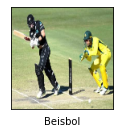

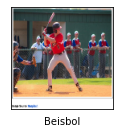

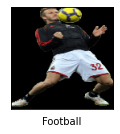

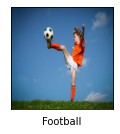

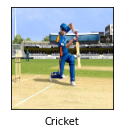

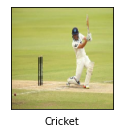

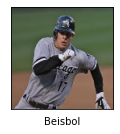

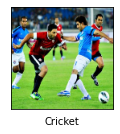

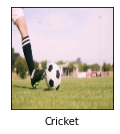

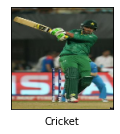

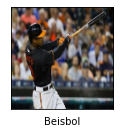

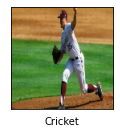

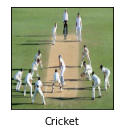

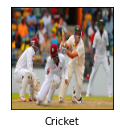

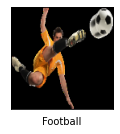

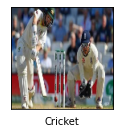

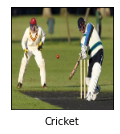

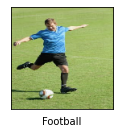

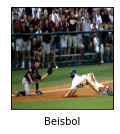

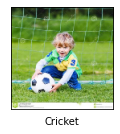

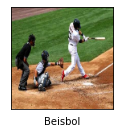

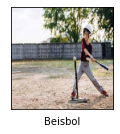

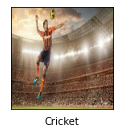

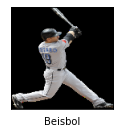

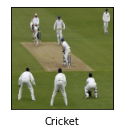

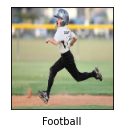

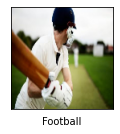

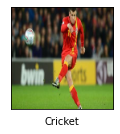

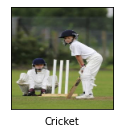

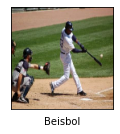

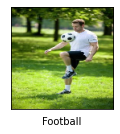

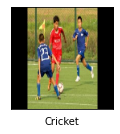

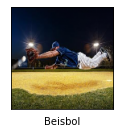

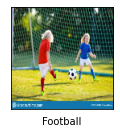

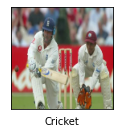

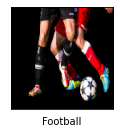

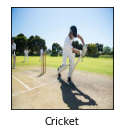

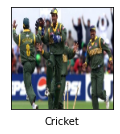

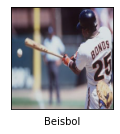

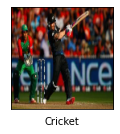

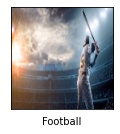

In [34]:
for i in range(len(test)):
    plt.figure(figsize=(30,20))
    plt.subplot(9,5,i+1)
    plt.xticks([])
    plt.yticks([])
    if preds[i] == 0:
        plt.xlabel('Beisbol')
        plt.imshow(test[i])
    elif preds[i] == 1:
        plt.xlabel('Cricket')
        plt.imshow(test[i])
    else:
        plt.xlabel('Football')
        plt.imshow(test[i])
plt.show()

In [35]:
true = [1,0,2,2,1,1,0,2,2,1,0,0,1,1,2,1,1,2,0,2,0,0,2,0,1,0,1,2,1,0,2,2,0,2,1,2,1,1,0,1,0]

In [36]:
len(true)

41

In [37]:
pred_res = 0
pred_128_res = 0
for i in range(len(preds)):
    if preds[i] == true[i]:
        pred_res += 1
    if preds_128[i] == true[i]:
        pred_128_res += 1

print('preds para 64x64: ', pred_res, '\nPreds para 128x128: ', pred_128_res)

preds para 64x64:  30 
Preds para 128x128:  29
